In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.shape

(2930, 82)

In [4]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [5]:
housing = df[['SalePrice','Lot Area','Overall Qual','Overall Cond', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr','MS Zoning', 'Lot Shape', 'Neighborhood', 'Central Air', 'Sale Condition', 'Mo Sold', 'Yr Sold']]

In [6]:
housing.head()

,SalePrice,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Bedroom AbvGr,MS Zoning,Lot Shape,Neighborhood,Central Air,Sale Condition,Mo Sold,Yr Sold
0,215000,31770,6,5,1656,0,3,RL,IR1,NAmes,Y,Normal,5,2010
1,105000,11622,5,6,896,0,2,RH,Reg,NAmes,Y,Normal,6,2010
2,172000,14267,6,6,1329,0,3,RL,IR1,NAmes,Y,Normal,6,2010
3,244000,11160,7,5,2110,0,3,RL,Reg,NAmes,Y,Normal,4,2010
4,189900,13830,5,5,928,701,3,RL,IR1,Gilbert,Y,Normal,3,2010


In [7]:
housing.shape

(2930, 14)

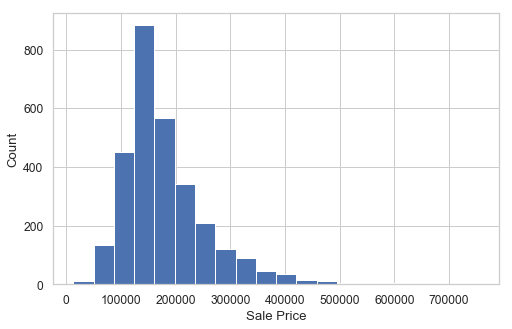

In [8]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

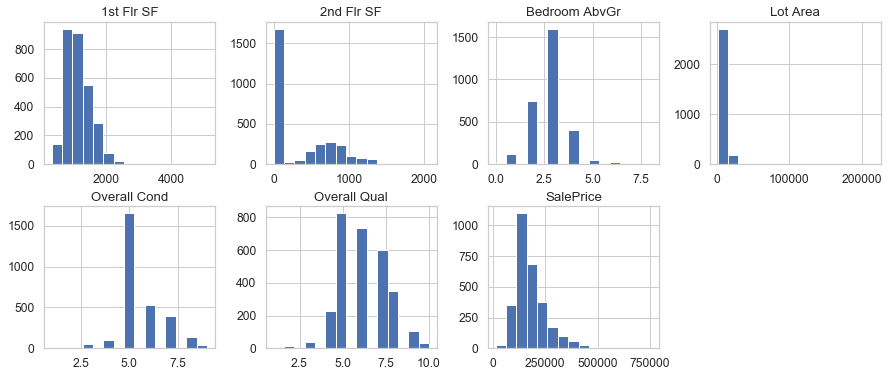

In [9]:
housing[['SalePrice','Lot Area','Overall Qual','Overall Cond', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr']].hist(bins=15, figsize=(15, 6), layout=(2, 4));

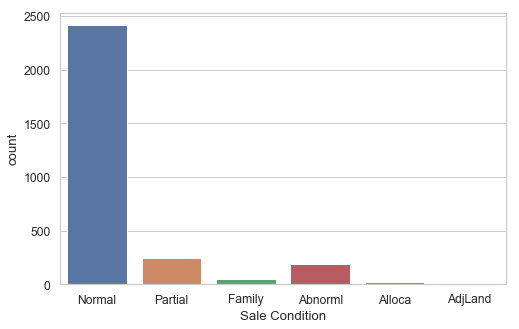

In [10]:
sns.countplot(housing['Sale Condition'])

In [11]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10))
#for variable, subplot in zip(categorical, ax.flatten()):
#    sns.countplot(housing[variable], ax=subplot)
#    for label in subplot.get_xticklabels():
#        label.set_rotation(90)

In [13]:
#housing.groupby('Mo Sold')['Yr Sold'].count()
#dfnew = housing[housing['Yr Sold'] == '2010']
#dfnew


In [19]:
#dfnew.groupby('Mo Sold')['Yr Sold'].count()

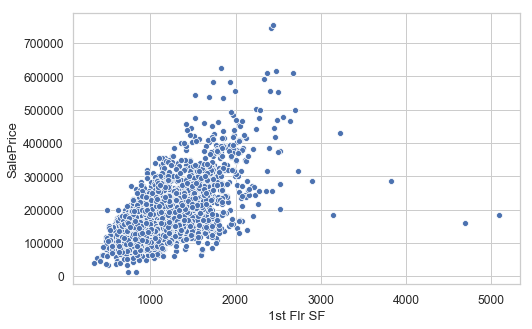

In [15]:
sns.scatterplot(x = housing ['1st Flr SF'], y = housing['SalePrice'])

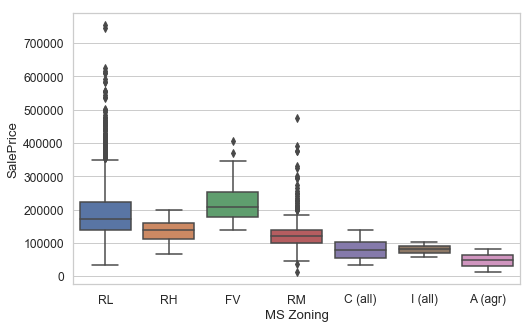

In [16]:
sns.boxplot(x='MS Zoning', y='SalePrice', data=housing)

The above shows homes in the category 'FV' or Floating Value are the most valuable.

In [17]:
#REVIEW
#ax = plt.subplots(3, 3, figsize=(15, 10))
#for var in housing:
#    sns.boxplot(x=var, y='SalePrice', data=housing, ax = subplot)

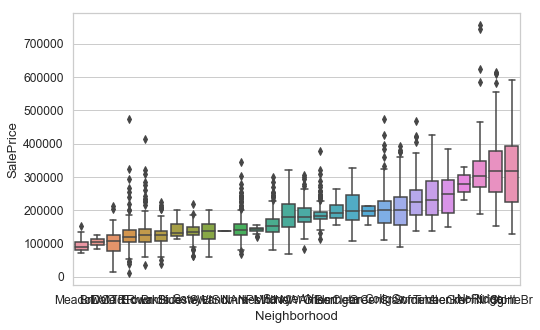

In [21]:
medianprice = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(medianprice.index))

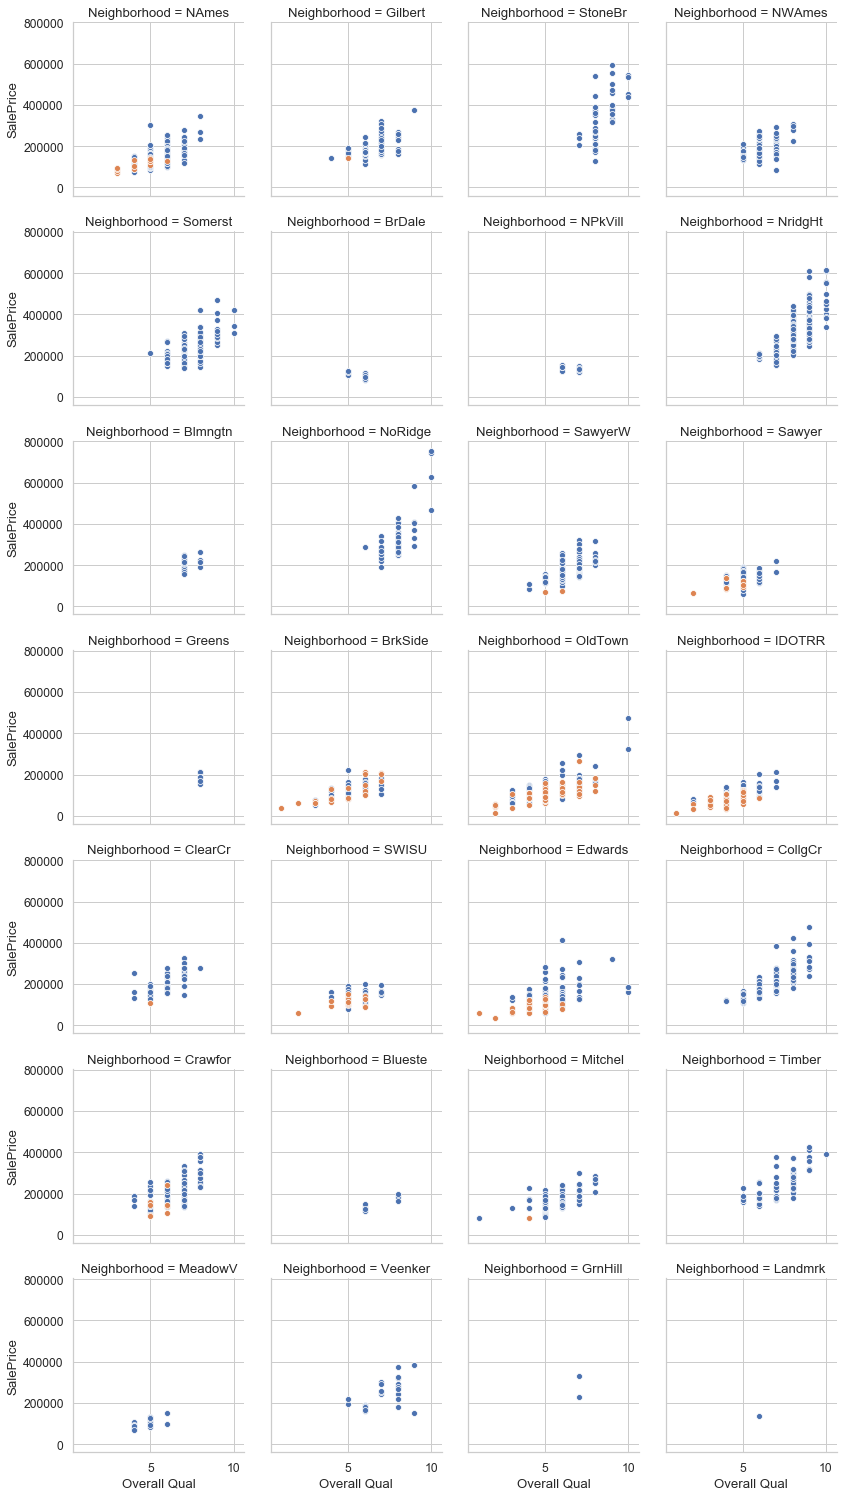

In [24]:
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', hue='Central Air', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Overall Qual', 'SalePrice');


SIMPLE LINEAR REGRESSION TO PREDICT HOUSE PRICE BASED ON 1ST FLOOR AREA

In [45]:
# define independent variable
# Split the data into training/testing sets
# Train with data except the last 900 which will be used for testing 70:30 split
# np.newaxis creates a 1D array
FloorArea_train = housing['1st Flr SF'][:-900][:, np.newaxis] #all elements from beginning to final 900
FloorArea_test = housing['1st Flr SF'][-900:][:, np.newaxis]

TargetPrice_train = housing['SalePrice'][:-900][:, np.newaxis]#TargetPrice[:-(int(0.2*len(FloorArea)))] #all elements from beginning to final 100
TargetPrice_test = housing['SalePrice'][-900:][:, np.newaxis]#TargetPrice[-(int(0.8*len(FloorArea))):]


In [47]:
# Create linear regression object by assigning a variable to the LinearRegression() object or class
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(FloorArea_train, TargetPrice_train)

# Make predictions using the testing set
TargtPrice_pred = regr.predict(FloorArea_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(TargetPrice_test, TargtPrice_pred))
# Explained variance score: 1 is perfect prediction, 0 is random 
print('Variance score: %.2f' % r2_score(TargetPrice_test, TargtPrice_pred))



Coefficients: 
 [[133.34512414]]
Mean squared error: 4217898635.03
Variance score: 0.30


With a variance of 0.30, 1st Floor area is not a very strong predictor of SalePrice. Let's try Overall Condition

In [50]:

# define independent variable
# Split the data into training/testing sets
# Train with data except the last 900 which will be used for testing 70:30 split
# np.newaxis creates a 1D array
Var_train = housing['Lot Area'][:-900][:, np.newaxis] #all elements from beginning to final 900
Var_test = housing['Lot Area'][-900:][:, np.newaxis]

TargetPrice_train = housing['SalePrice'][:-900][:, np.newaxis]#TargetPrice[:-(int(0.2*len(FloorArea)))] #all elements from beginning to final 100
TargetPrice_test = housing['SalePrice'][-900:][:, np.newaxis]#TargetPrice[-(int(0.8*len(FloorArea))):]



In [51]:
# Create linear regression object by assigning a variable to the LinearRegression() object or class
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Var_train, TargetPrice_train)

# Make predictions using the testing set
TargtPrice_pred = regr.predict(Var_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(TargetPrice_test, TargtPrice_pred))
# Explained variance score: 1 is perfect prediction, 0 is random 
print('Variance score: %.2f' % r2_score(TargetPrice_test, TargtPrice_pred))

Coefficients: 
 [[2.75082195]]
Mean squared error: 5542437801.69
Variance score: 0.08
